In [74]:
!pwd

/Users/digitaldieter/coding/projects/jupyter/exercices


In [31]:
#!pip install statsmodels

### Get a Time Series to analyze

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
import random

%matplotlib inline

df = sns.load_dataset('flights')

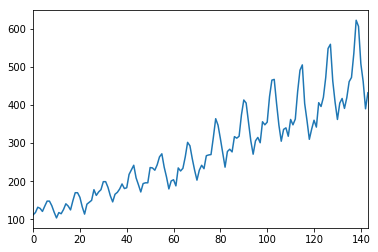

In [33]:
df['passengers'].plot()

<h2 data-toc-modified-id="ARIMA-modelrequeisre-the-data-to-be-1" id="ARIMA-modelrequeisre-the-data-to-be"><a class="toc-mod-link" id="ARIMA-modelrequeisre-the-data-to-be-1"></a><span class="toc-item-num">1&nbsp;&nbsp;</span>ARIMA model requeisre the data to be</h2>

<p>&nbsp;</p>

<p>1. Non seasonal</p>

<p>2. Without a trend</p>


### Autocorrelation
correlation for each time shift -> ACF plot

In [34]:
y = df['passengers']

In [35]:
df['p1'] = df['passengers'].shift(1)
df['p2'] = df['passengers'].shift(2)
df['p3'] = df['passengers'].shift(3)
df['p4'] = df['passengers'].shift(4)
df['p5'] = df['passengers'].shift(5)

In [61]:
df.head(10)

,year,month,passengers,p1,p2,p3,p4,p5
0,1949,January,112,NaN,NaN,NaN,NaN,NaN
1,1949,February,118,112.0,NaN,NaN,NaN,NaN
2,1949,March,132,118.0,112.0,NaN,NaN,NaN
3,1949,April,129,132.0,118.0,112.0,NaN,NaN
4,1949,May,121,129.0,132.0,118.0,112.0,NaN
5,1949,June,135,121.0,129.0,132.0,118.0,112.0
6,1949,July,148,135.0,121.0,129.0,132.0,118.0
7,1949,August,148,148.0,135.0,121.0,129.0,132.0
8,1949,September,136,148.0,148.0,135.0,121.0,129.0
9,1949,October,119,136.0,148.0,148.0,135.0,121.0


In [37]:
# correlate lags

In [38]:
# means seasonality / trends
df[['passengers', 'p1','p2', 'p3', 'p4', 'p5']].corr()

,passengers,p1,p2,p3,p4,p5
passengers,1.000000,0.960195,0.895675,0.837395,0.797735,0.785943
p1,0.960195,1.000000,0.960249,0.894473,0.836002,0.799965
p2,0.895675,0.960249,1.000000,0.961133,0.896597,0.844427
p3,0.837395,0.894473,0.961133,1.000000,0.960920,0.899075
p4,0.797735,0.836002,0.896597,0.960920,1.000000,0.962171
p5,0.785943,0.799965,0.844427,0.899075,0.962171,1.000000


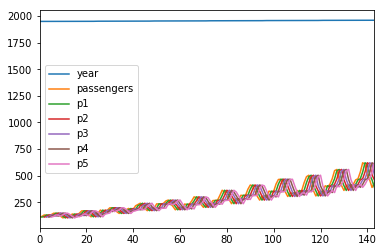

In [62]:
df.plot()
None

<h1>Statsmodel has a convenient function&nbsp;hooray!</h1>


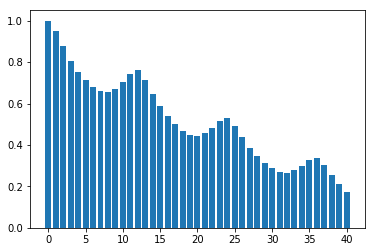

In [63]:
from statsmodels.tsa.stattools import acf

autocorr = acf(df['passengers'])
plt.bar(range(len(autocorr)),autocorr)
None

if the ACF plot drops quickly to near-zero, you have neither a trend nor seasonality

In [41]:
from matplotlib import pyplot as plt
import random

%matplotlib inline

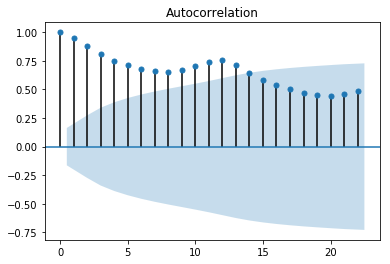

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['passengers'])
#plot_acf(df['passengers'],lags=20)
#plt.bar(range(len(autocorr)),autocorr)
None

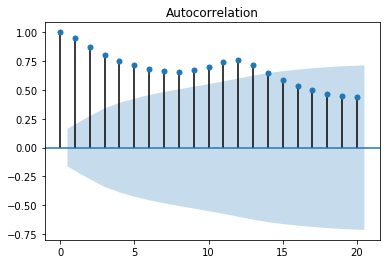

In [43]:
plot_acf(df['passengers'],lags=20)
None

<h1 data-toc-modified-id="Counterexample:-random-data-1" id="Counterexample:-random-data"><a class="toc-mod-link" id="Counterexample:-random-data-1"></a><span class="toc-item-num">1&nbsp;&nbsp;</span>Counterexample: random data</h1>

<h2>No Autocorr for random data</h2>


In [73]:
ry = [random.random] for i in range(1000)

SyntaxError: invalid syntax (<ipython-input-73-415619909fe1>, line 1)

In [ ]:
#No Autocorr for random data

### Autoregressive Model

p = hyperparameter how many periods we look into the past

AR(p):

$y_t = c + w_1 y_{t-1} + w_2 y_{t-2} .. + w_p y_{t-p} + \epsilon_t$

In [ ]:
# generate date (200 persiods) using an AR(p) process
data = [0,0]
c = 18.0
w1 = -0.8

for i in range(200):
    yt = c + w1 * data[-1]
    data.append(yt)

In [ ]:
# generate date (200 persiods) using an AR(p) process
data = [12,5]
c = 18.0
w1 = -0.8

for i in range(200):
    yt = c + w1 * data[-1] + random.random()
    data.append(yt)

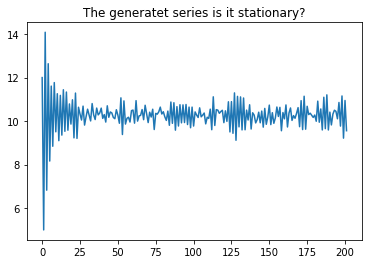

In [45]:
plt.plot(list(range(202)), data)
plt.title("The generatet series is it stationary?")
None

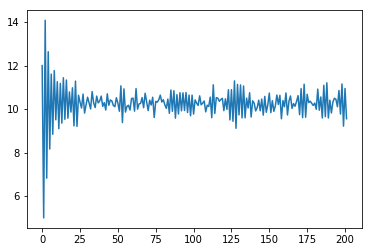

In [46]:
plt.plot(list(range(202)), data)
None

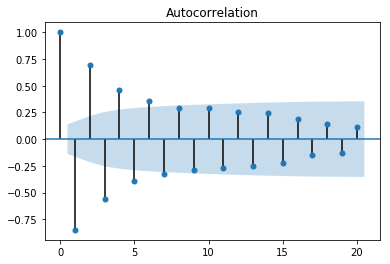

In [47]:
plot_acf(data, lags=20)
None

Try:
* c=18, w1=-0.8
* c= 8, w1= 1.3, w2=-0.7

In [48]:
# generate data (200 periods)

<BarContainer object of 41 artists>

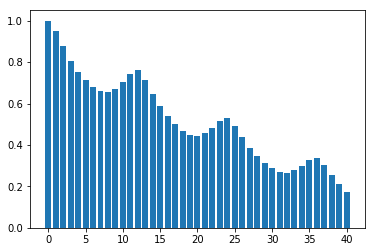

In [49]:
autocorr = acf(y)
plt.bar(range(len(autocorr)), autocorr)
None

### Initialize and fit an ARIMA model

In [66]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [67]:
y_train = data[:150] #different from sklearn train test split
y_test = data[150:] # test set always the last part of your data

In [68]:
# (ar, d, ma) <- Order of the ARIMA model
#                (usually small numbers)
# ar - autoregressive part
#  d - damping
# ma - moving average part

#1 -> 2 -> look 2 steps into the past
#2 -> 0 dumping irgends value
#3 -> 2 moving average of the residuals
m = ARIMA(y_train, (2, 0, 2))
m.initialize()
r = m.fit()

In [69]:
y_pred, err, conf = r.forecast(steps=50) #predicted error. confidance
y_pred.shape

(50,)

In [70]:
# plot the forecast
r.fittedvalues
r.fittedvalues.shape

(150,)

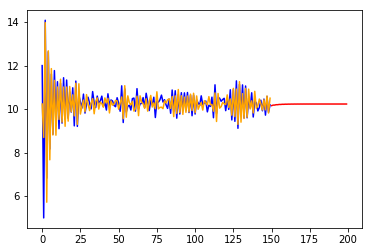

In [72]:
plt.plot(range(150),y_train, color='blue')
plt.plot(range(150),r.fittedvalues, color='orange')
plt.plot(range(150,200), y_pred, color='red')
None

In [57]:
# now predict 1 period at a time
r.forecast(steps=1)

(array([10.15967229]),
 array([0.40873929]),
 array([[ 9.358558  , 10.96078658]]))

In [58]:
# plot again